In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('Dataset.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [21]:
#31 nd 33
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [22]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

relevant_columns = {
    'Attrition': 'Loyalty',
    'MonthlyIncome': 'Greed',
    'DistanceFromHome': 'Influence1',
    'BusinessTravel': 'Influence2',
    'JobSatisfaction': 'Satisfaction1',
    'EnvironmentSatisfaction': 'Satisfaction2',
    'WorkLifeBalance': 'Satisfaction3',
    'JobInvolvement': 'Commitment1',
    'YearsAtCompany': 'Commitment2',
    'JobLevel': 'Respect1',
    'YearsSinceLastPromotion': 'Respect2',
    'MaritalStatus': 'PersonalTies',
    'Age': 'Age',
    'OverTime': 'Stress'
}


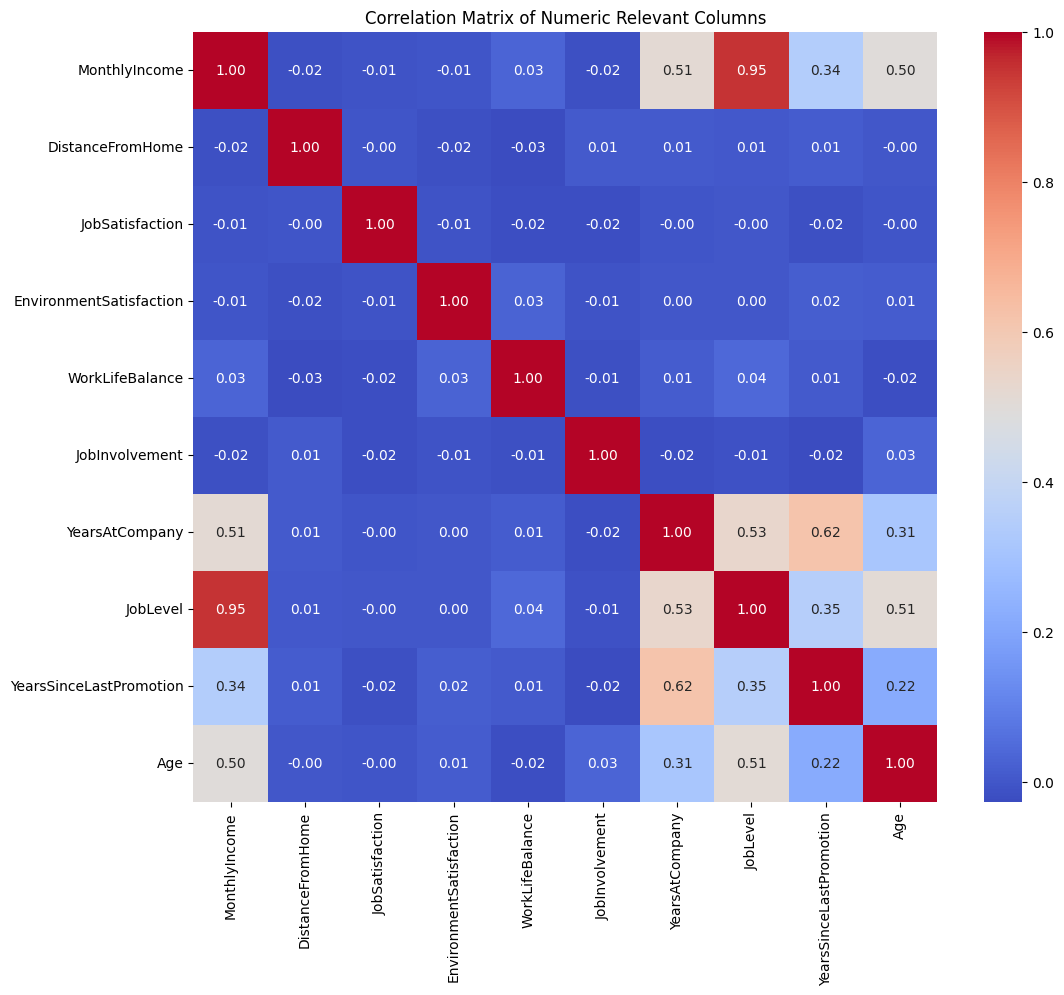

In [23]:
numeric_cols = [col for col in relevant_columns.keys() if pd.api.types.is_numeric_dtype(df[col])]
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Relevant Columns')
plt.show()


### There is a lot of correlation between monthlyIncome, YearsAtCompany, JobLevel, YearsSincerLastPromotion and age. In the Tata Motors one there was good correlation in almost everything.

In [24]:
for column in relevant_columns.keys():
    fig = px.histogram(df, x=column)
    fig.update_layout(bargap=0.2)
    fig.show()

In [25]:
betray_df = df[list(relevant_columns.keys())].rename(columns=relevant_columns)

# Analysis
1. Most of the people will tend to have no attrition which is obvious.
2. Most of the soldiers would come under lower pay grade which can be seen in the hist.
3. Age seems like normally distributed.
4. The rest are just following the normal trend.

In [26]:
scaler = MinMaxScaler()
betray_df[['Greed', 'Influence1']] = scaler.fit_transform(betray_df[['Greed', 'Influence1']])

In [27]:
business_travel_map = {'Travel_Rarely': 0.5, 'Travel_Frequently': 1, 'Non-Travel': 0}
betray_df['Influence2'] = betray_df['Influence2'].map(business_travel_map)

In [28]:
betray_df['Influence2'] = scaler.fit_transform(betray_df[['Influence2']])

In [29]:
betray_df['Loyalty'] = betray_df['Loyalty'].map({'Yes': 0, 'No': 1})
betray_df['PersonalTies'] = betray_df['PersonalTies'].map({'Single': 0, 'Married': 1, 'Divorced': 0.5})

In [30]:
betray_df['Age'] = scaler.fit_transform(betray_df[['Age']])
betray_df['Stress'] = betray_df['Stress'].map({'Yes': 1, 'No': 0})

In [31]:
for column in ['Satisfaction1', 'Satisfaction2', 'Commitment1', 'Respect1', 'Satisfaction3']:
    betray_df[column] = np.exp(betray_df[column])
    betray_df[column] = scaler.fit_transform(betray_df[[column]])

In [32]:
betray_df['Respect2'] = betray_df['Respect2'] / 5
betray_df['Respect2'] = np.exp(betray_df['Respect2'])
betray_df['Respect2'] = scaler.fit_transform(betray_df[['Respect2']])


In [33]:
betray_df

,Loyalty,Greed,Influence1,Influence2,Satisfaction1,Satisfaction2,Satisfaction3,Commitment1,Commitment2,Respect1,Respect2,PersonalTies,Age,Stress
0,0,0.262454,0.000000,0.5,1.000000,0.090031,0.000000,0.334759,6,0.032059,0.000000,0.0,0.547619,1
1,1,0.217009,0.250000,1.0,0.090031,0.334759,0.334759,0.090031,10,0.032059,0.011601,1.0,0.738095,0
2,0,0.056925,0.035714,0.5,0.334759,1.000000,0.334759,0.090031,0,0.000000,0.000000,0.0,0.452381,1
3,1,0.100053,0.071429,1.0,0.334759,1.000000,0.334759,0.334759,8,0.000000,0.043075,1.0,0.357143,1
4,1,0.129489,0.035714,0.5,0.090031,0.000000,0.334759,0.334759,2,0.000000,0.025769,1.0,0.214286,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,0.082254,0.785714,1.0,1.000000,0.334759,0.334759,1.000000,5,0.032059,0.000000,1.0,0.428571,0
1466,1,0.472986,0.178571,0.5,0.000000,1.000000,0.334759,0.090031,7,0.119203,0.011601,1.0,0.500000,0
1467,1,0.270300,0.107143,0.5,0.090031,0.090031,0.334759,1.000000,6,0.032059,0.000000,1.0,0.214286,1
1468,1,0.230700,0.035714,1.0,0.090031,1.000000,0.090031,0.090031,9,0.032059,0.000000,1.0,0.738095,0


In [34]:
betray_df

,Loyalty,Greed,Influence1,Influence2,Satisfaction1,Satisfaction2,Satisfaction3,Commitment1,Commitment2,Respect1,Respect2,PersonalTies,Age,Stress
0,0,0.262454,0.000000,0.5,1.000000,0.090031,0.000000,0.334759,6,0.032059,0.000000,0.0,0.547619,1
1,1,0.217009,0.250000,1.0,0.090031,0.334759,0.334759,0.090031,10,0.032059,0.011601,1.0,0.738095,0
2,0,0.056925,0.035714,0.5,0.334759,1.000000,0.334759,0.090031,0,0.000000,0.000000,0.0,0.452381,1
3,1,0.100053,0.071429,1.0,0.334759,1.000000,0.334759,0.334759,8,0.000000,0.043075,1.0,0.357143,1
4,1,0.129489,0.035714,0.5,0.090031,0.000000,0.334759,0.334759,2,0.000000,0.025769,1.0,0.214286,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,0.082254,0.785714,1.0,1.000000,0.334759,0.334759,1.000000,5,0.032059,0.000000,1.0,0.428571,0
1466,1,0.472986,0.178571,0.5,0.000000,1.000000,0.334759,0.090031,7,0.119203,0.011601,1.0,0.500000,0
1467,1,0.270300,0.107143,0.5,0.090031,0.090031,0.334759,1.000000,6,0.032059,0.000000,1.0,0.214286,1
1468,1,0.230700,0.035714,1.0,0.090031,1.000000,0.090031,0.090031,9,0.032059,0.000000,1.0,0.738095,0


In [35]:
betray_df.nunique()

,0
Loyalty,2
Greed,1349
Influence1,29
Influence2,3
Satisfaction1,4
Satisfaction2,4
Satisfaction3,4
Commitment1,4
Commitment2,37
Respect1,5


In [36]:
from google.colab import files

betray_df.to_csv('betray_df.csv', encoding = 'utf-8-sig')
files.download('betray_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:




# Correlation Matrix
correlation_matrix = betray_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Betrayal Data')
plt.show()

# Pairplot for Visualizing Relationships
sns.pairplot(betray_df)
plt.show()

# Boxplots for Outlier Detection and Distribution
for column in betray_df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=betray_df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

# Histograms for Data Distribution
for column in betray_df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(betray_df[column], kde=True)
    plt.title(f'Histogram for {column}')
    plt.show()

# Analyze Attrition Rate (Loyalty)
print(betray_df['Loyalty'].value_counts(normalize=True))
# Analyze the relationship between attrition and other factors
for column in betray_df.columns:
    if column != 'Loyalty':
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='Loyalty', y=column, data=betray_df)
        plt.title(f'Relationship between Loyalty and {column}')
        plt.show()


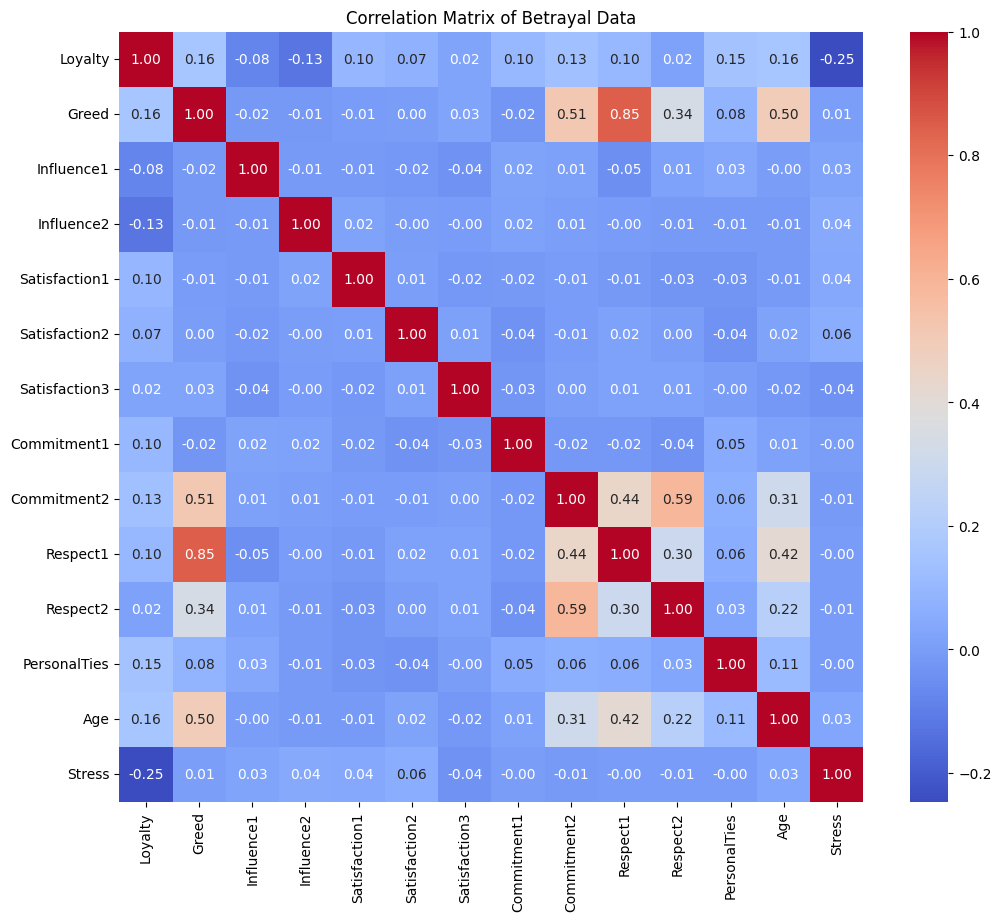

In [38]:
correlation_matrix = betray_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Betrayal Data')
plt.show()

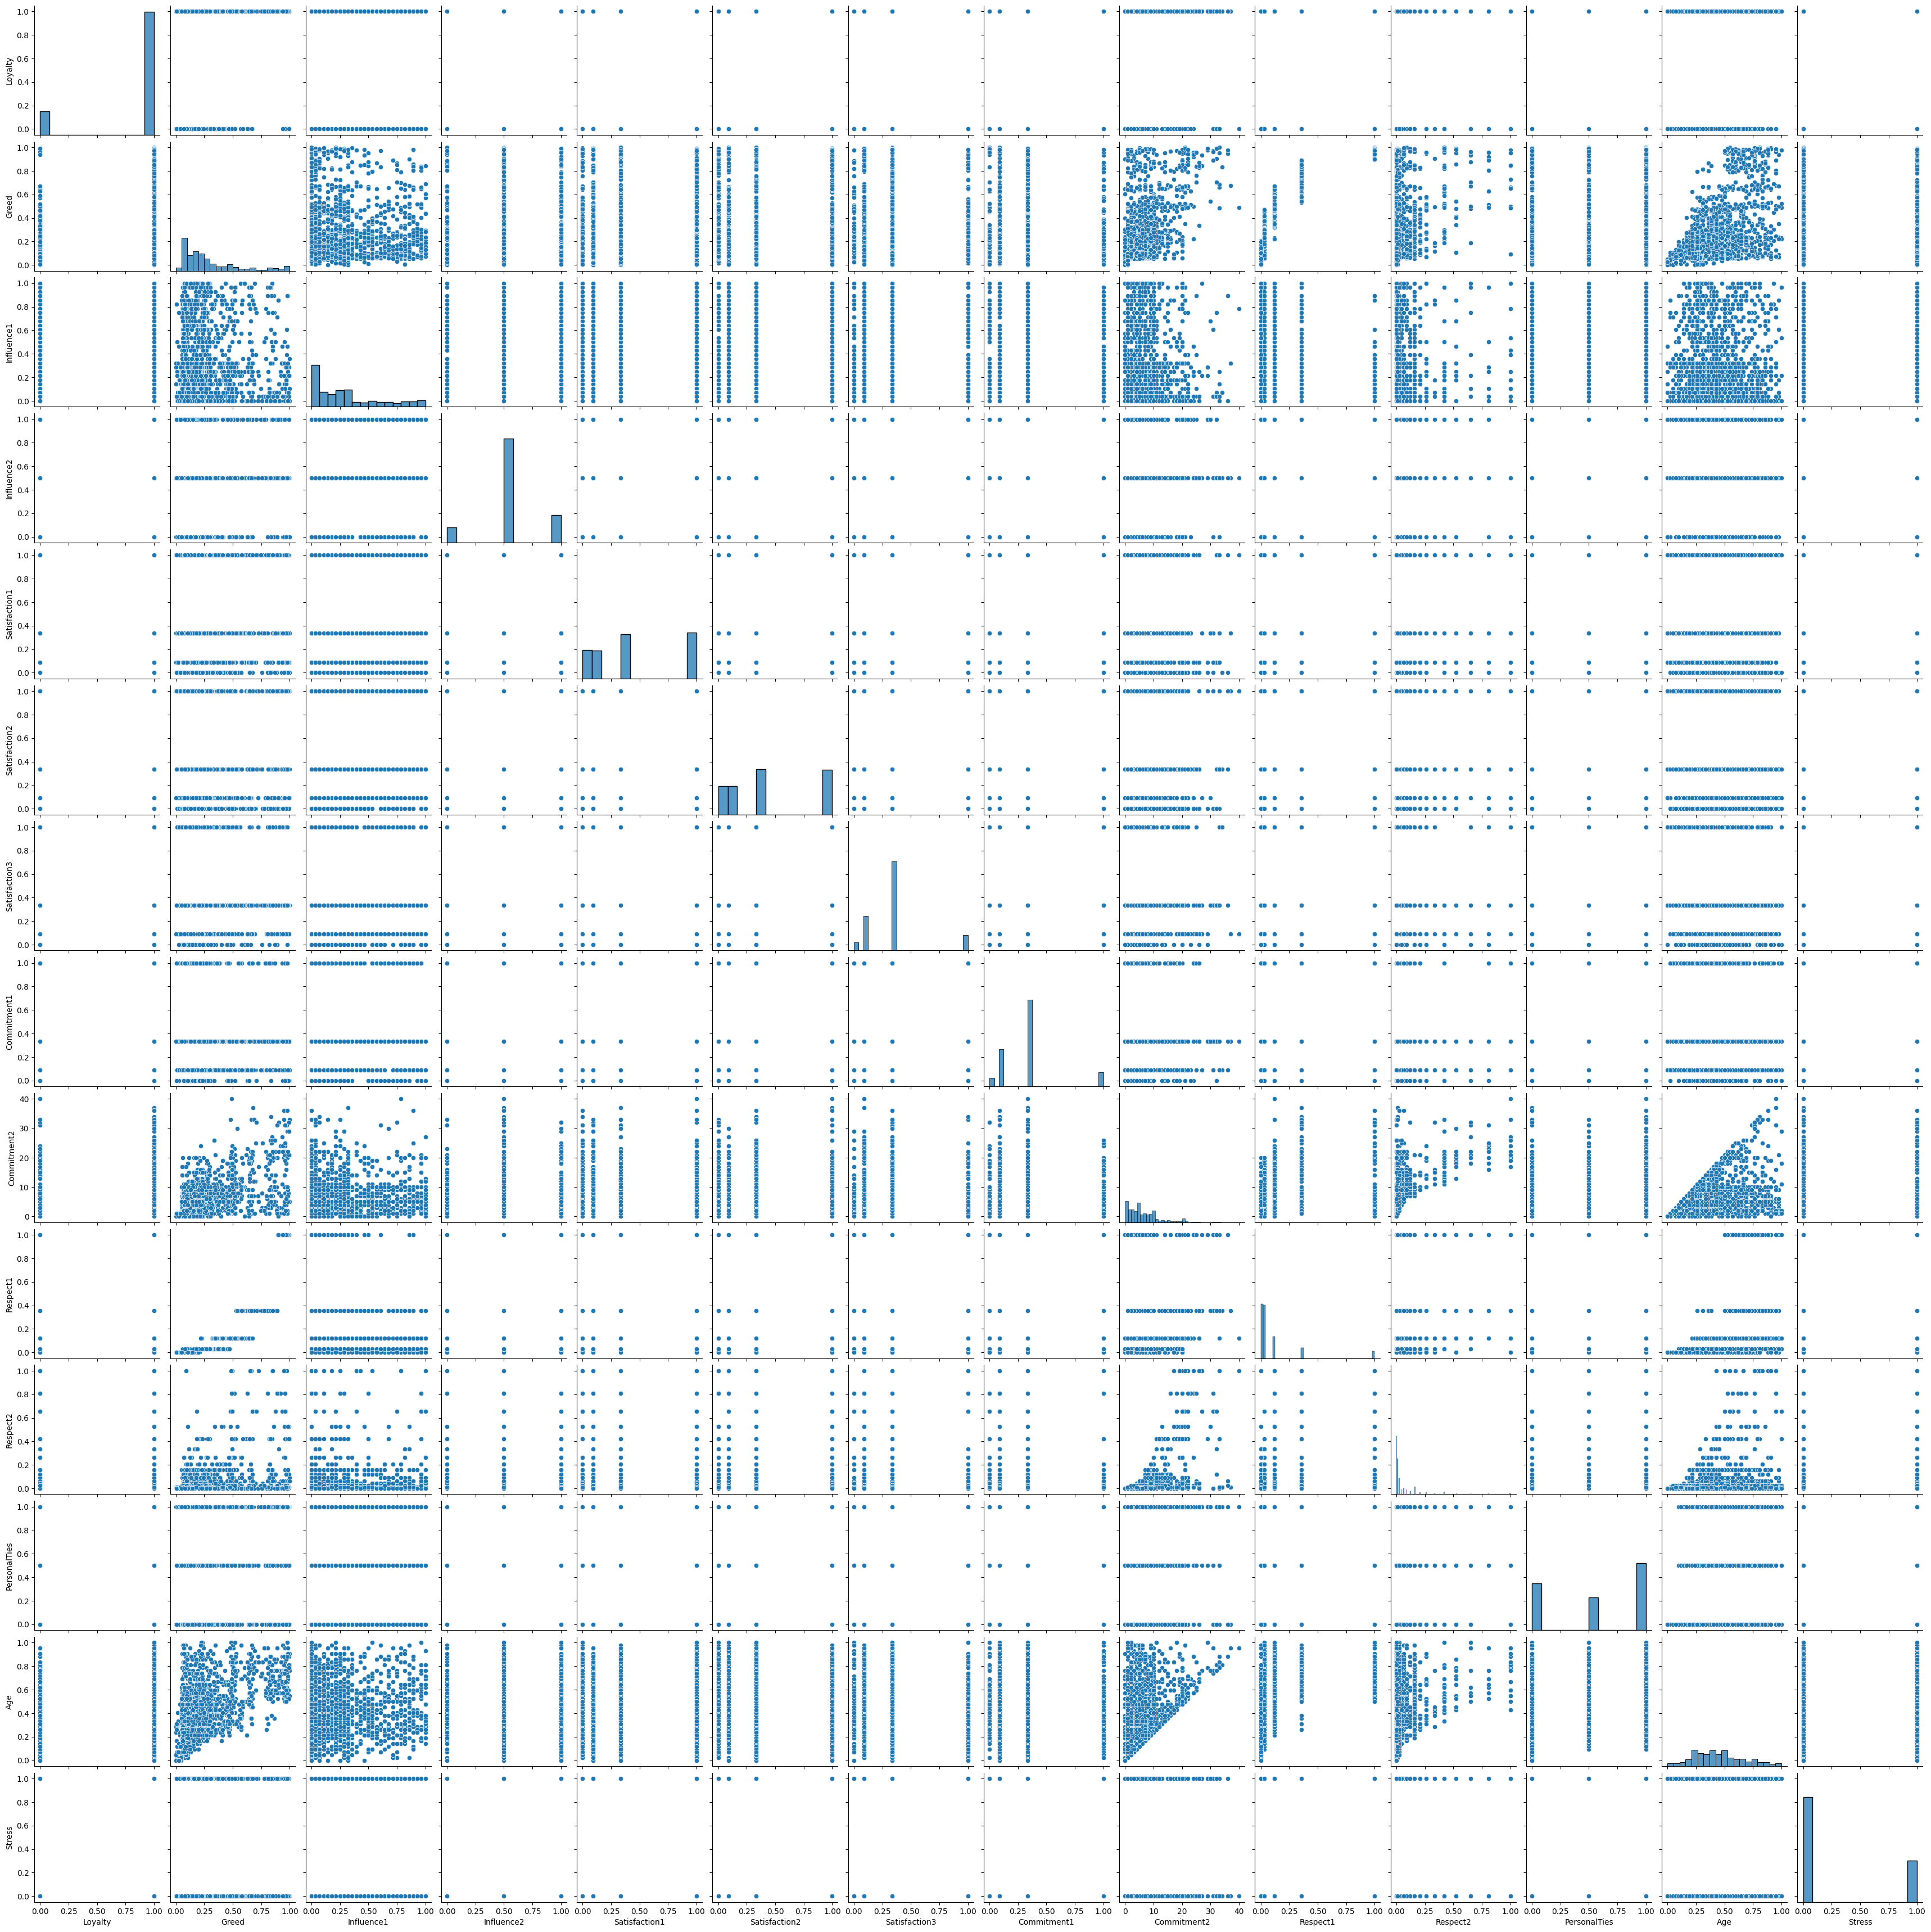

In [39]:
sns.pairplot(betray_df)
plt.show()

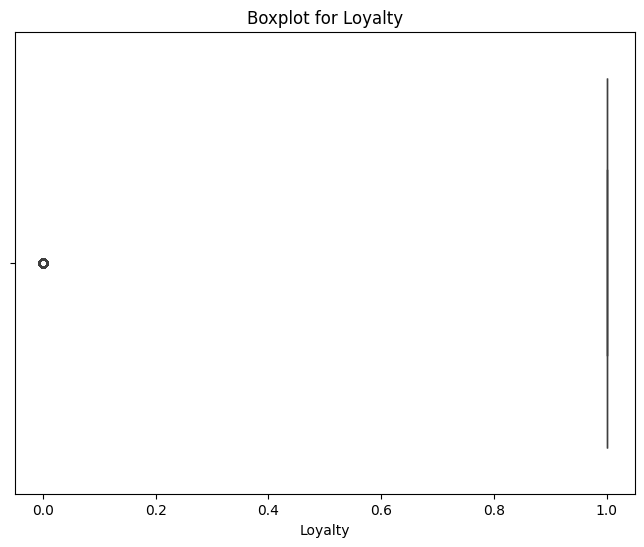

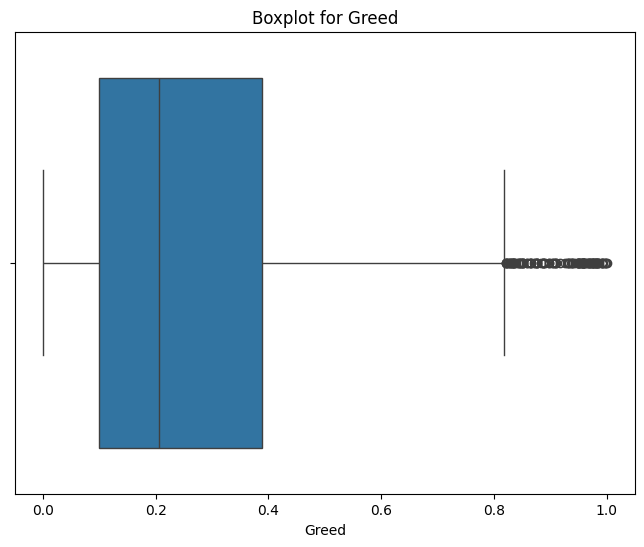

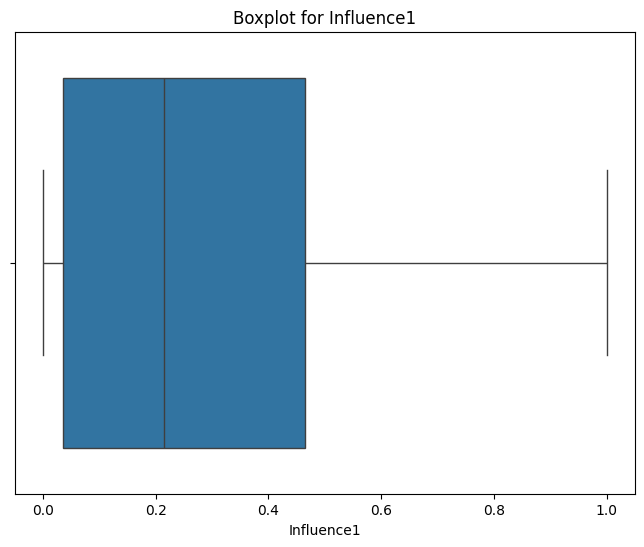

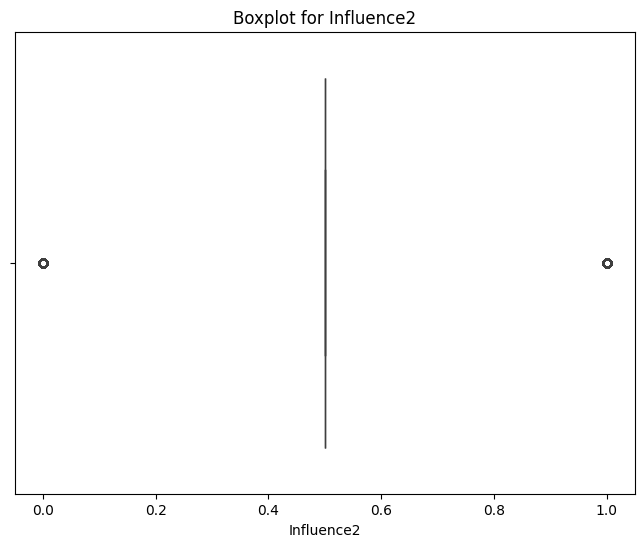

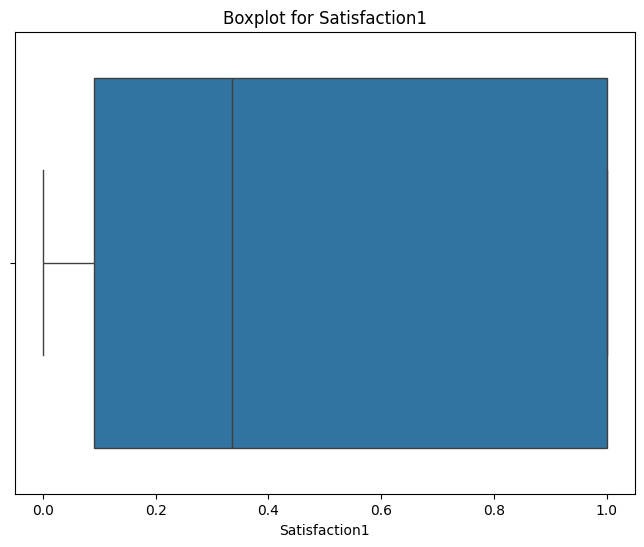

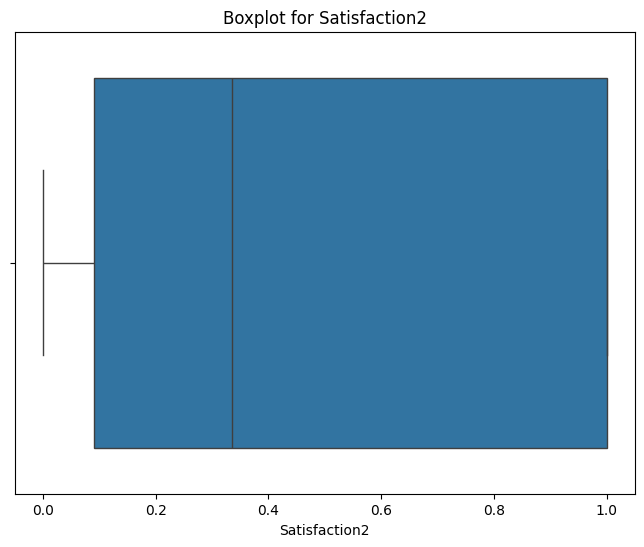

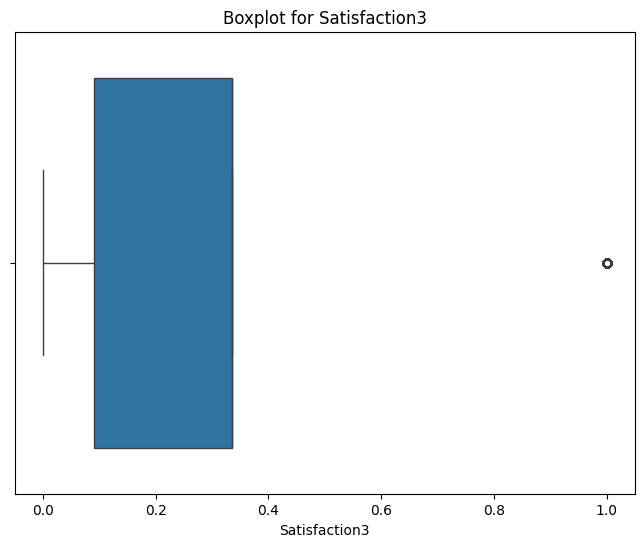

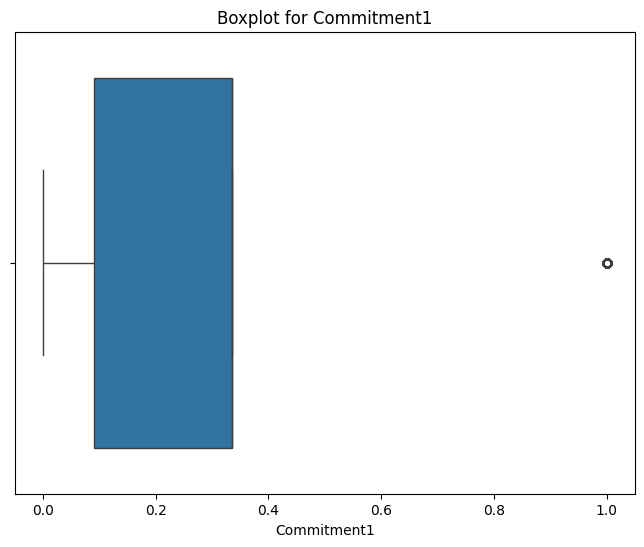

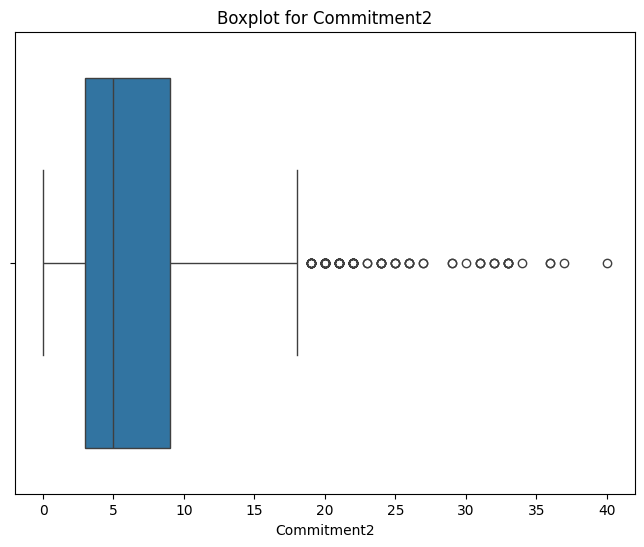

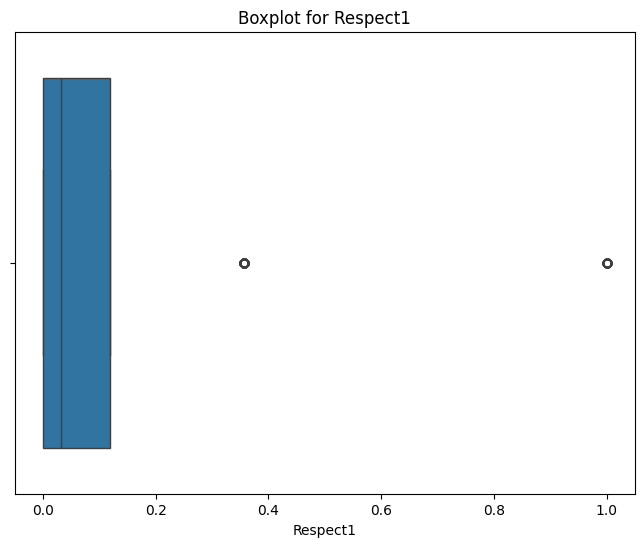

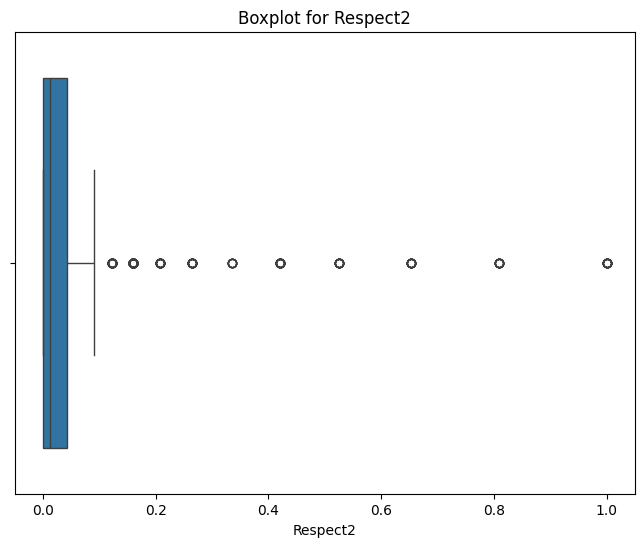

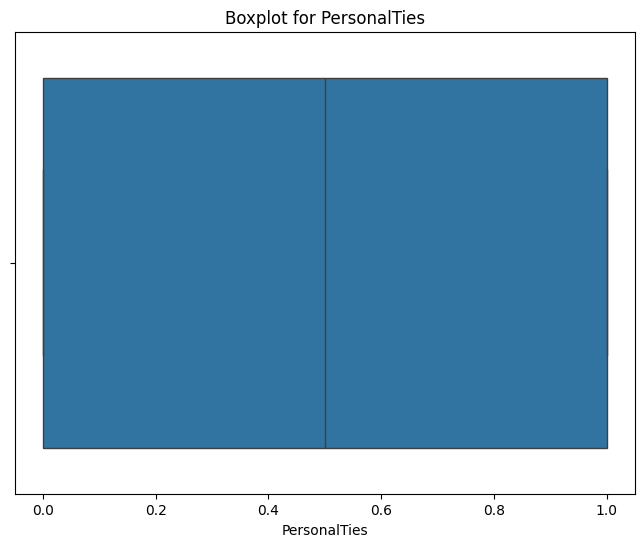

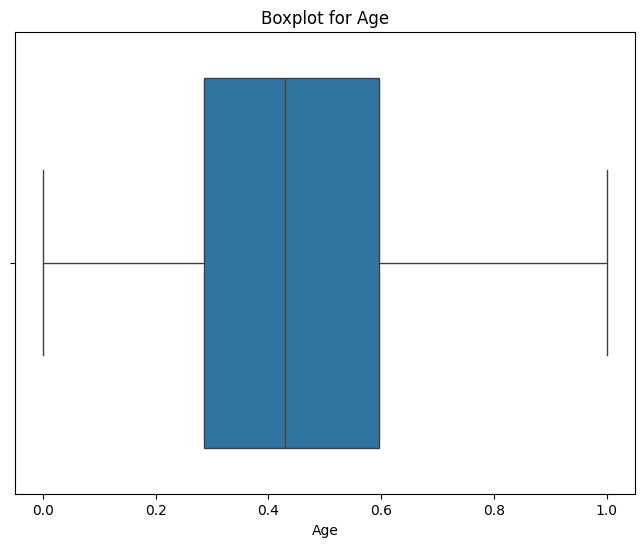

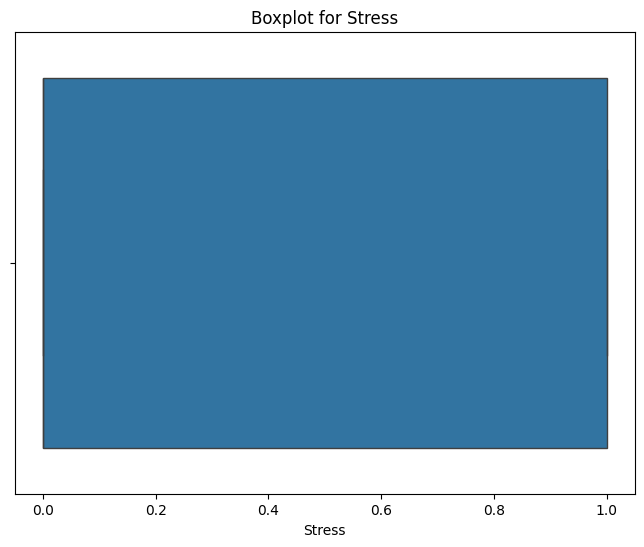

In [40]:
for column in betray_df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=betray_df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

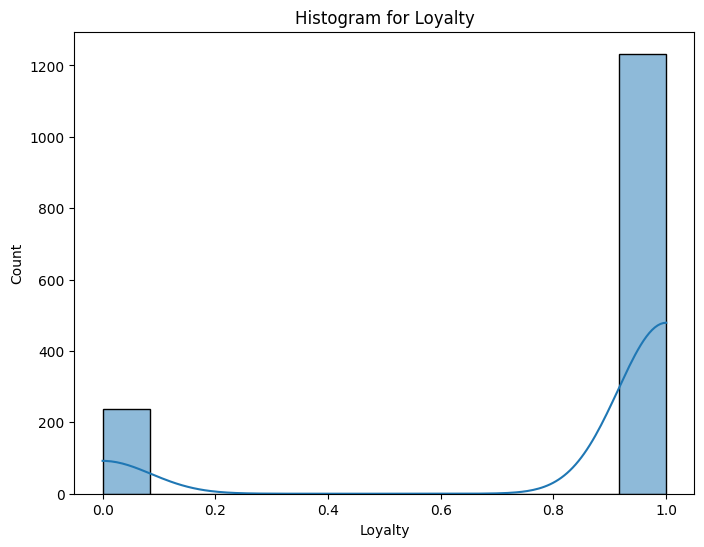

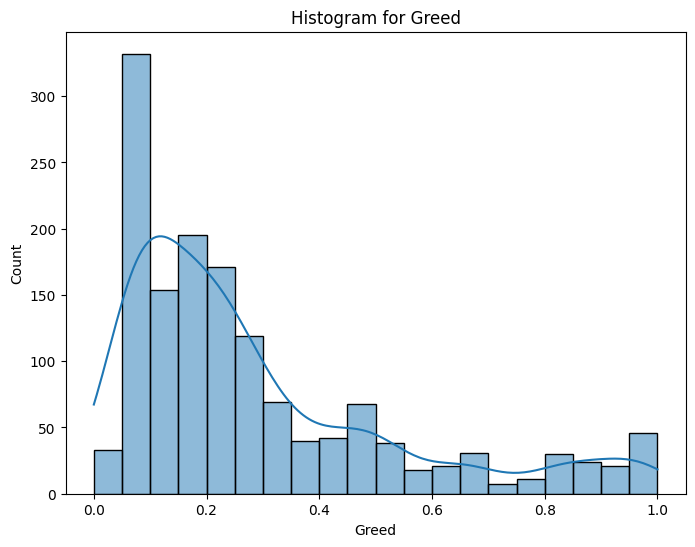

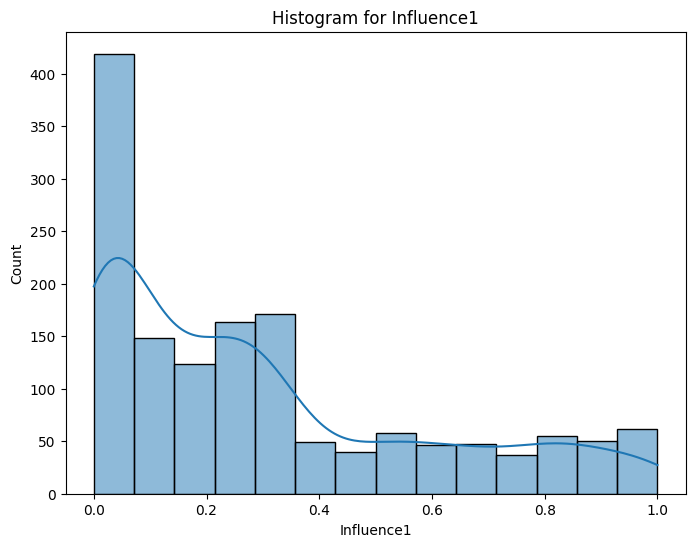

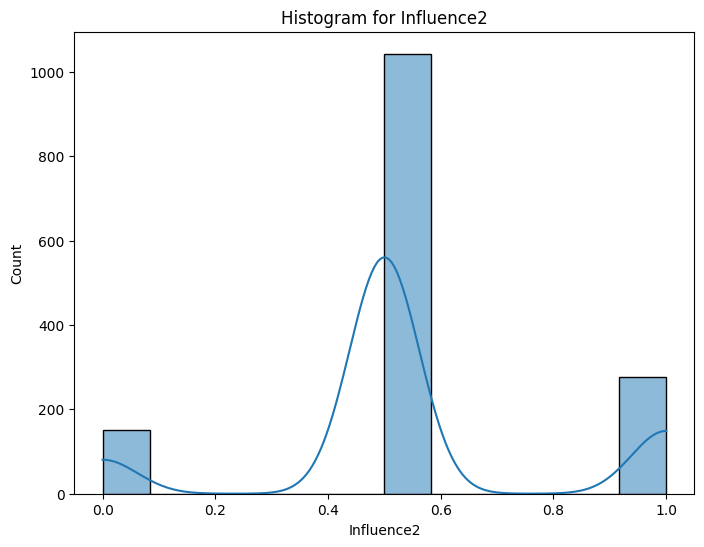

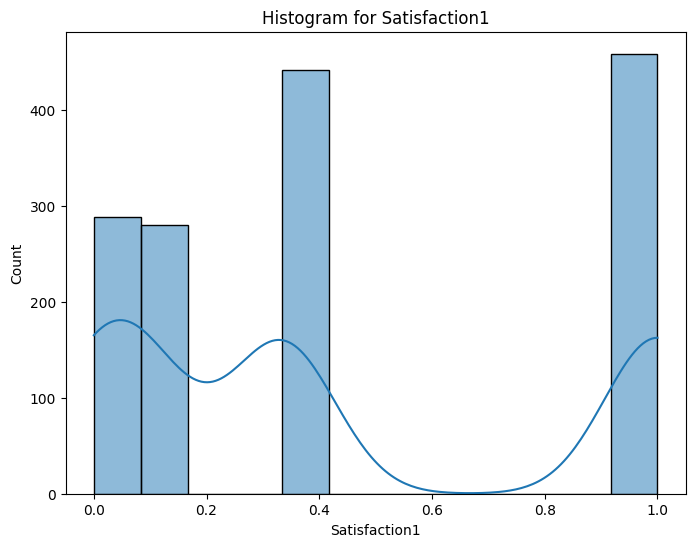

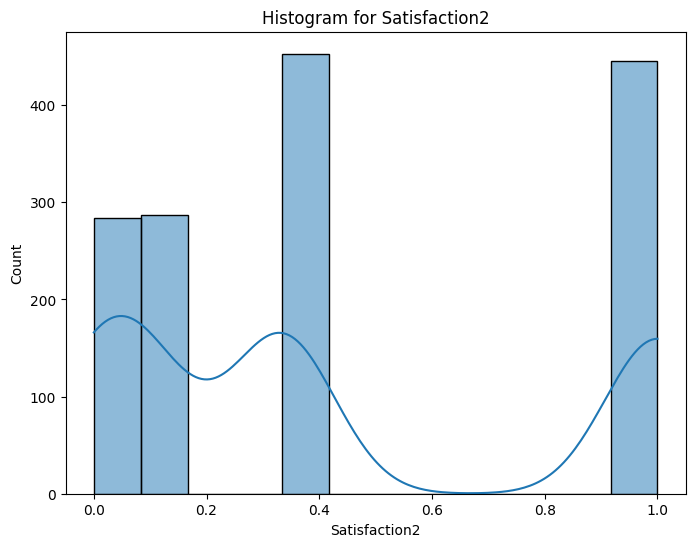

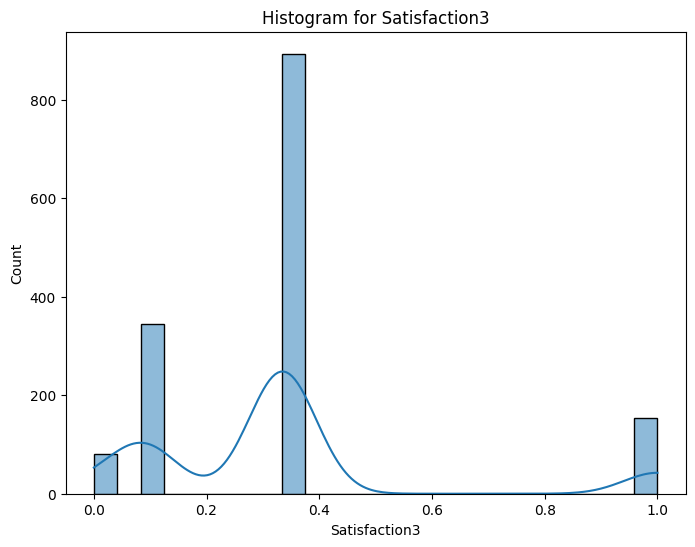

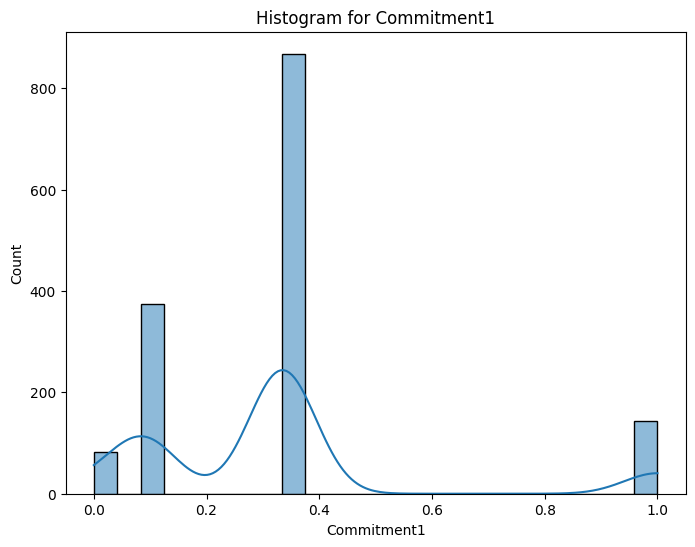

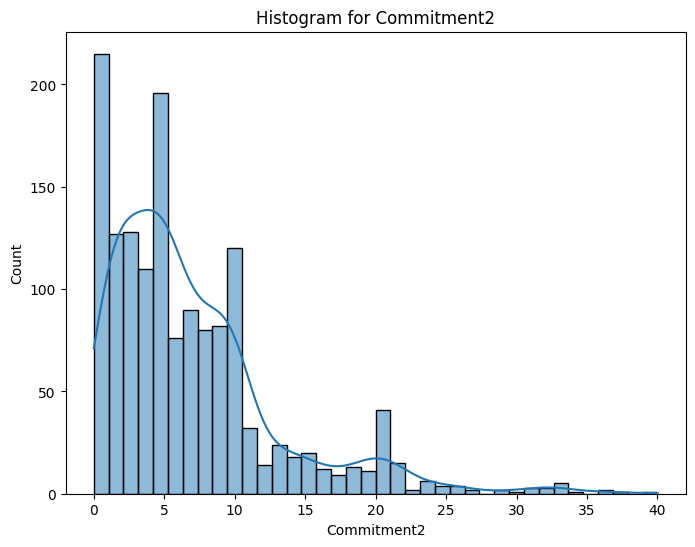

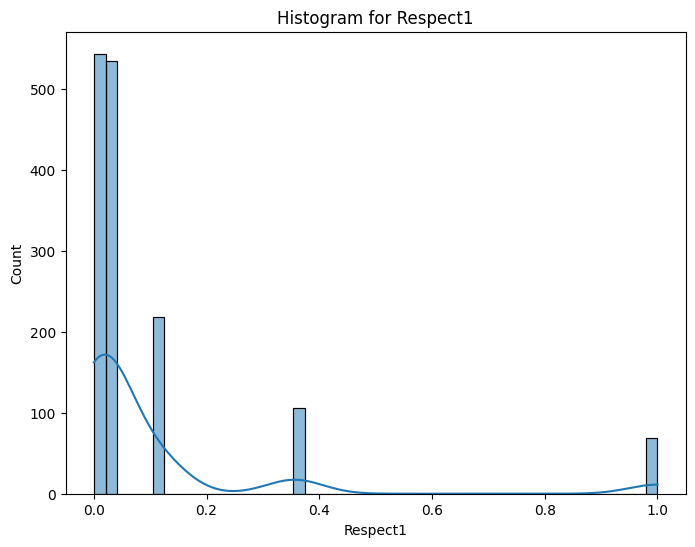

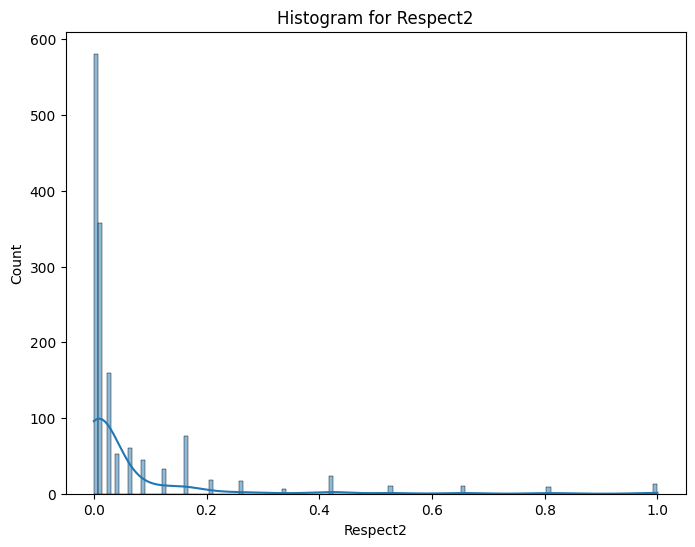

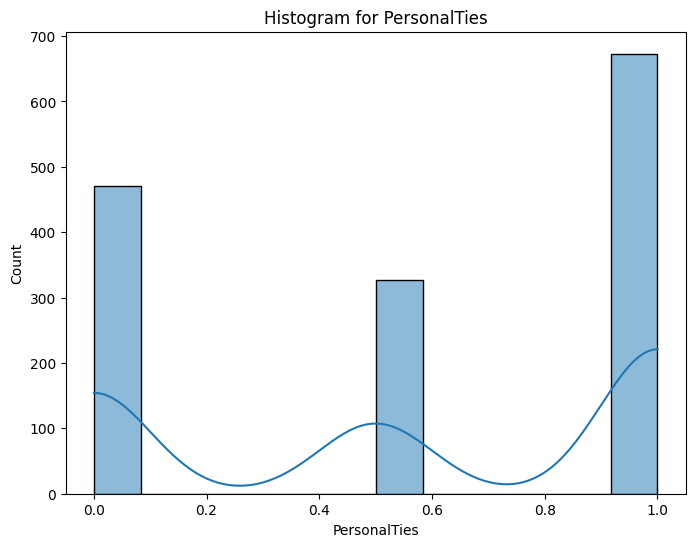

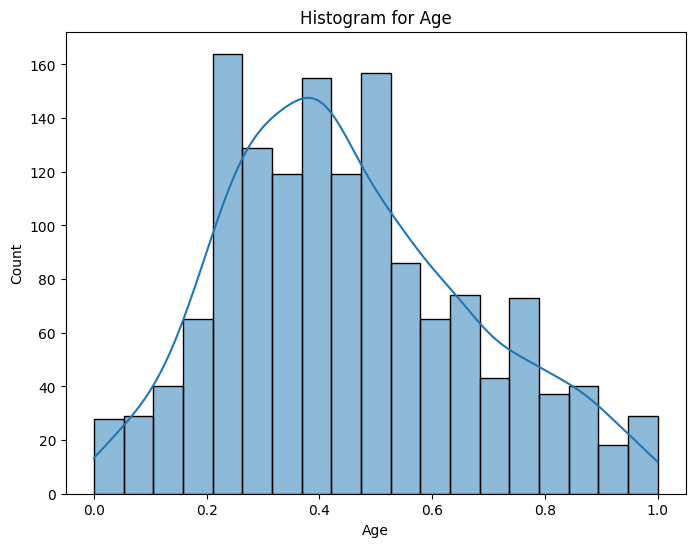

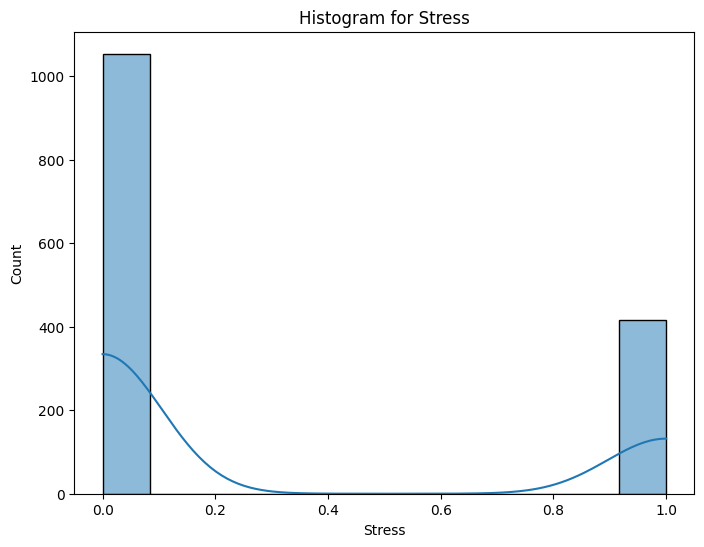

In [41]:
for column in betray_df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(betray_df[column], kde=True)
    plt.title(f'Histogram for {column}')
    plt.show()

Loyalty
1    0.838776
0    0.161224
Name: proportion, dtype: float64


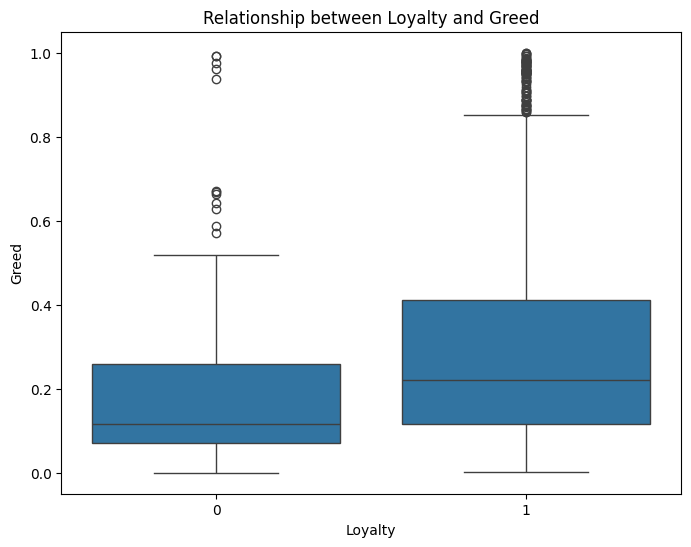

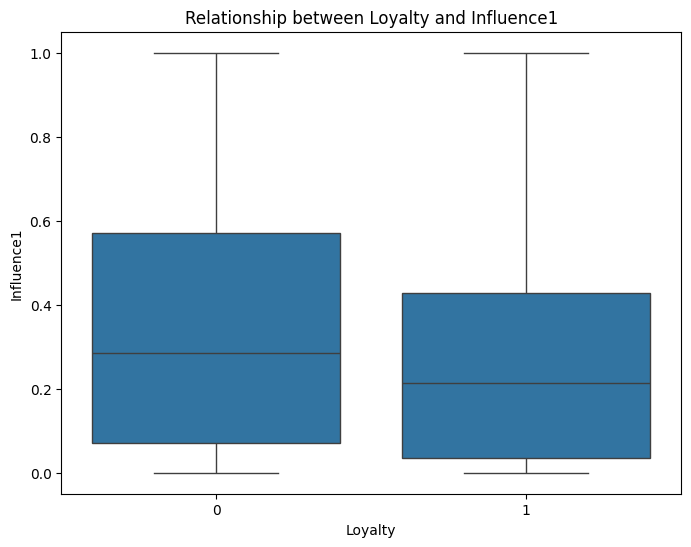

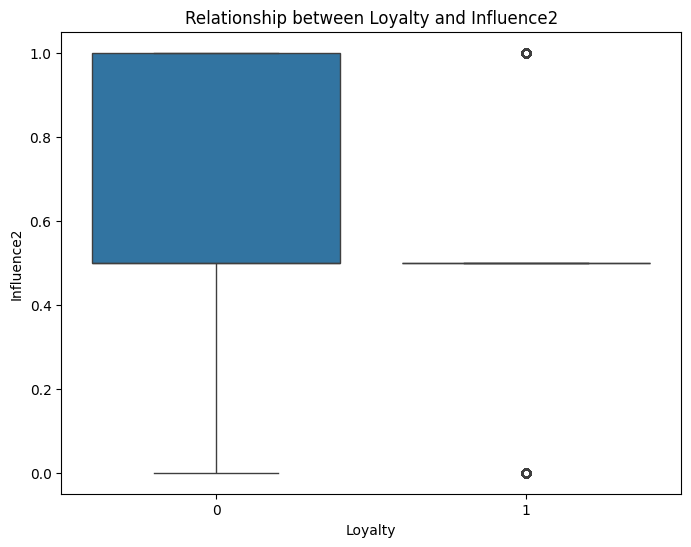

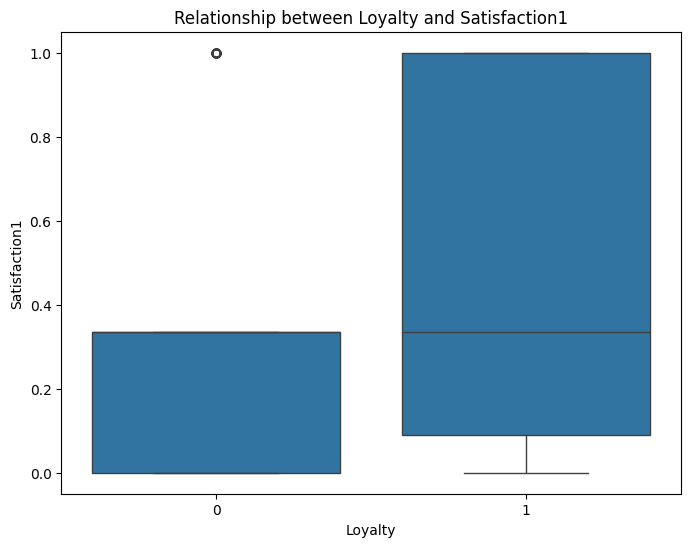

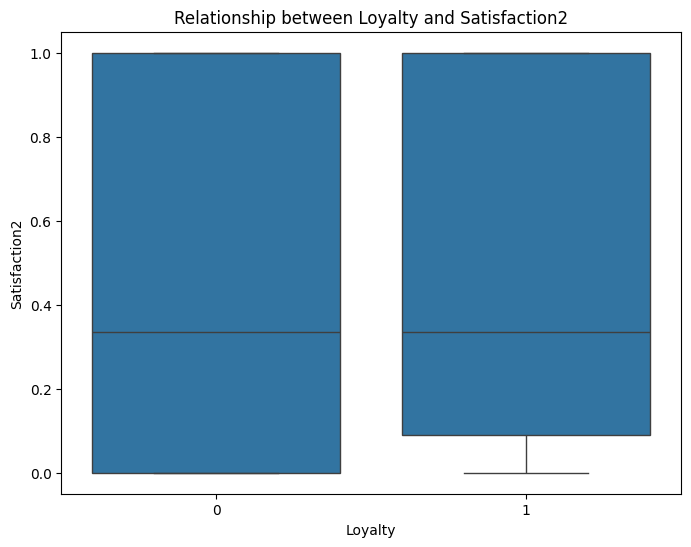

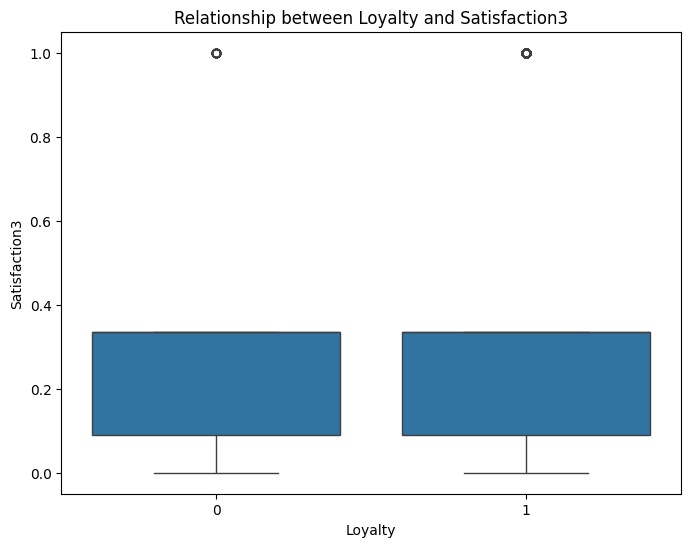

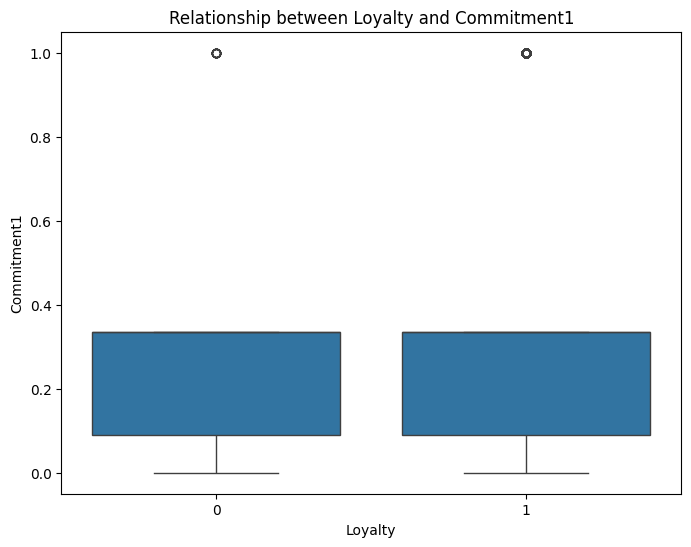

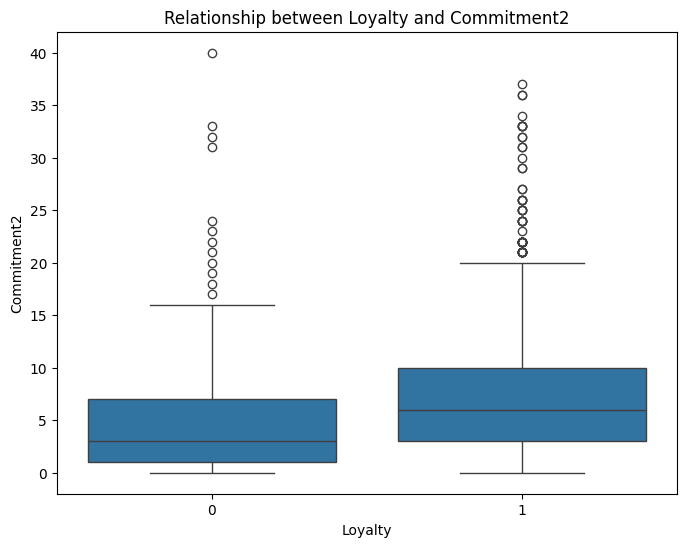

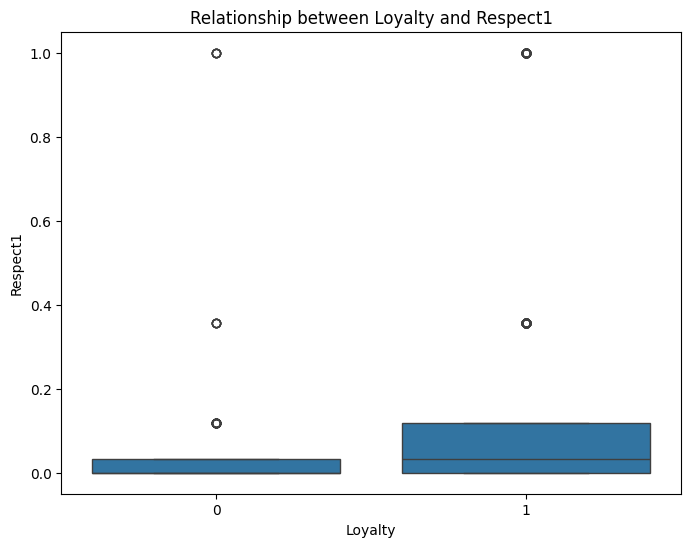

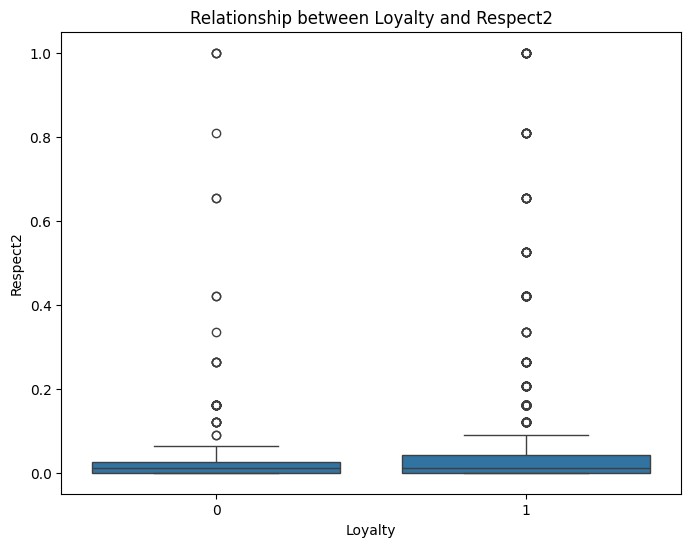

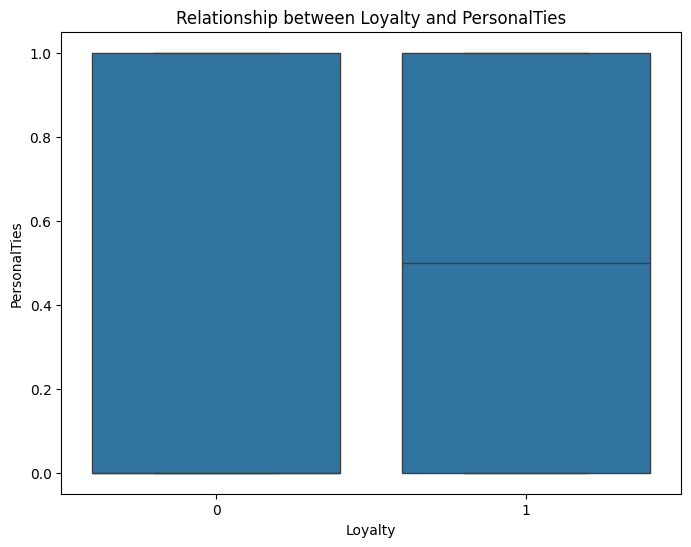

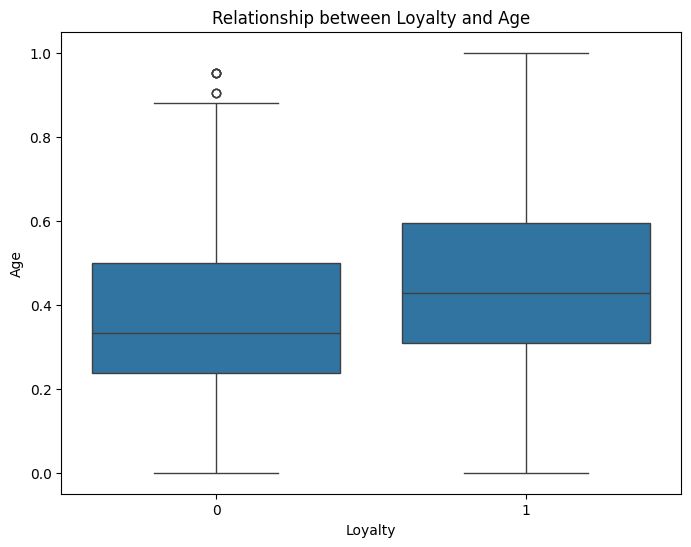

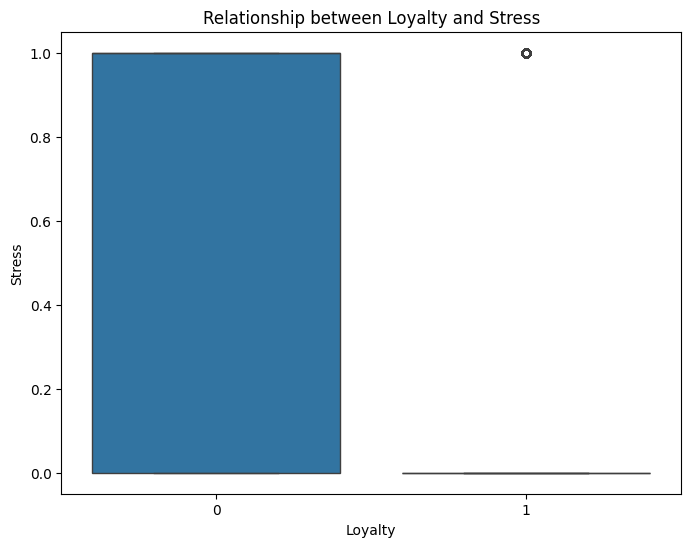

In [42]:
print(betray_df['Loyalty'].value_counts(normalize=True))
# Analyze the relationship between attrition and other factors
for column in betray_df.columns:
    if column != 'Loyalty':
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='Loyalty', y=column, data=betray_df)
        plt.title(f'Relationship between Loyalty and {column}')
        plt.show()
